<a href="https://colab.research.google.com/github/Tanushreep698/OIBSIP/blob/main/level2project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving creditcard.csv to creditcard.csv
🔍 Preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.14

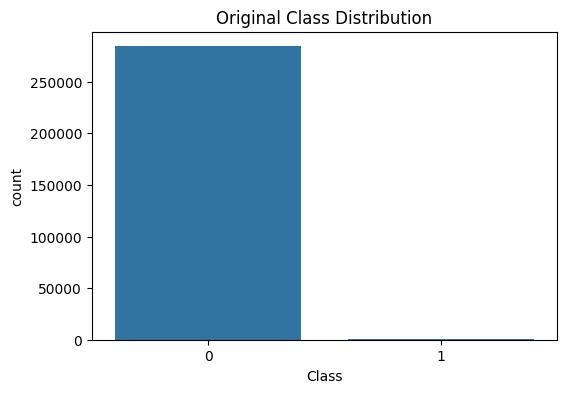

In [ ]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE
from google.colab import files

# 📂 Step 2: Upload Dataset
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))

# 👀 Step 3: Explore Dataset
print("🔍 Preview:")
print(df.head())

print("\n📊 Info:")
print(df.info())

print("\n⚠️ Class Distribution:")
print(df['Class'].value_counts())  # 0 = Legit, 1 = Fraud

# 🧹 Step 4: Data Cleaning
print("\n❓ Missing Values:")
print(df.isnull().sum())

# 🧮 Step 5: Feature Engineering
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler.fit_transform(df[['Time']])

df_model = df.drop(['Time', 'Amount'], axis=1)

# 🎯 Step 6: Define Features and Target
X = df_model.drop('Class', axis=1)
y = df_model['Class']

# ⚖️ Step 7: Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 📈 Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🧠 Step 9: Train Models
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 🔍 Step 10: Evaluate Models
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

evaluate_model(lr, "Logistic Regression")
evaluate_model(rf, "Random Forest")

# 📉 Step 11: Visualize Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Original Class Distribution")
plt.show()
